In [1]:
# Import some libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import linalg as LA

In [2]:
def read_review_data(file_name):
    review_data = pd.read_csv(file_name)
    print "Sample Data"
    print "-----------"
    print review_data.sample(5)
    return review_data

In [3]:
business_data = pd.read_csv('../business.csv')
business_data.head(1)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,11:0-21:0,False,NaN,NaN,NaN,T2E 6L6,NaN,11:0-21:0,NaN,Calgary,...,casual,NaN,NaN,NaN,NaN,True,"{'BusinessParking': ""{'garage': False, 'street...",True,False,False


In [4]:
business_data.set_index('business_id', inplace = True)

In [5]:
def get_restaurant_data(review_data, business_data):
    review_data['city'] = review_data.apply(lambda x: business_data.loc[x['business_id'], 'city'], axis=1)
    review_data['cat'] = review_data.apply(lambda x: business_data.loc[x['business_id'], 'categories'], axis=1)
    restaurant_reviews = review_data[review_data['cat'].str.contains("Restaurants",na=False)]
    return restaurant_reviews

def get_city_restaurant_data(city, restaurant_reviews):
    city_rest_data = restaurant_reviews.loc[review_data['city'] == city]
    return city_rest_data

In [6]:
review_data = read_review_data('40core.csv')
print '-----------------------------'
print 'Filtering the Restaurant data'
print '-----------------------------'
restaurant_reviews = get_restaurant_data(review_data, business_data)
print restaurant_reviews.head(3)
print '-----------------------------'
print 'restaurant reviews top 10 cities'
print '-----------------------------'
print restaurant_reviews['city'].value_counts().head(10)
print '-----------------------------'

Sample Data
-----------
                      user_id             business_id  stars
16259  mmUsLiQDb--7BBAxA6wKrA  SVUxmYs6_TvX5kWv0ok-MA      4
2676   8NPnK5h5Te91Ot6nbX9a5g  vl2IZrNJEA8npSjqXbdwxw      5
20397  WaAOt_eG0_-yLpG3fI--3g  DqcD3YflYhArFsC4KVUnOw      4
69524  -uk4wYCSmjWz8vH9XkqroA  L_ZLtfHvfzfoNVQ0-okTXg      5
77324  sL9dYZyNLpzLD3cfTWwyOQ  Cr4ipI-tr-R8Q0NilkWNkA      4
-----------------------------
Filtering the Restaurant data
-----------------------------
                  user_id             business_id  stars       city  \
0  AuIK5tF2GjO7SftHawTLKw  I-5qHCVwT7k_KH67-YOx3A      4  Henderson   
2  AuIK5tF2GjO7SftHawTLKw  Zmfq3DVhHdtVChhSxzoUHw      4  Las Vegas   
3  AuIK5tF2GjO7SftHawTLKw  pybIuTluqRhH_BQ3CJHlLw      5  Las Vegas   

                                                 cat  
0  Desserts, Restaurants, American (Traditional),...  
2                                  Restaurants, Thai  
3                                  Thai, Restaurants  
---------------

In [7]:
def get_city_restaurant_data(city, restaurant_reviews):
    city_rest_data = restaurant_reviews.loc[review_data['city'] == city]
    return city_rest_data

vegas_df = get_city_restaurant_data('Las Vegas', restaurant_reviews)
vegas_df.head()

,user_id,business_id,stars,city,cat
2,AuIK5tF2GjO7SftHawTLKw,Zmfq3DVhHdtVChhSxzoUHw,4,Las Vegas,"Restaurants, Thai"
3,AuIK5tF2GjO7SftHawTLKw,pybIuTluqRhH_BQ3CJHlLw,5,Las Vegas,"Thai, Restaurants"
4,AuIK5tF2GjO7SftHawTLKw,SycXTaA4MeJZuDK4Y1owDQ,3,Las Vegas,"Burgers, Restaurants, Bars, Nightlife, Sports ..."
5,AuIK5tF2GjO7SftHawTLKw,5shgJB7a-2_gdnzc0gsOtg,5,Las Vegas,"Restaurants, Tapas/Small Plates, Tapas Bars"
6,AuIK5tF2GjO7SftHawTLKw,UvF68aNDfzCWQbxO6-647g,3,Las Vegas,"Restaurants, Vietnamese, Sandwiches"


In [8]:
# Count number of unique users and number of unique restaurants in our dataset
unique_users = vegas_df['user_id'].unique().tolist()
unique_rests = vegas_df['business_id'].unique().tolist()
num_user = len(unique_users)
num_rest = len(unique_rests)

# Split to train and test
train, test = train_test_split(vegas_df, random_state = 8675309, stratify = vegas_df['business_id'])
num_train = train.shape[0]
num_test = test.shape[0]

print "Number of Users: {}".format(num_user)
print "Number of restaurants: {}".format(num_rest)

Number of Users: 1355
Number of restaurants: 858


In [9]:
user_ratings = vegas_df.groupby('user_id').agg(['count','mean']).reset_index()
restaurant_ratings = vegas_df.groupby('business_id').agg(['count','mean']).reset_index()

user_ratings.head()



user_id stars          
                          count      mean
0  ---1lKK3aKOuomHnwAkAow    33  3.787879
1  --RlSfc-QmcHFGHyX6aVjA    45  3.688889
2  -267Yx8RmdP6io2-qI4UcQ    72  4.055556
3  -2gOxVWcnBr5DclrrsWXCA    35  3.885714
4  -50XWnmQGqBgEI-9ANvLlg    96  4.000000

In [10]:
#   On the training dataset, what is the fraction of restaurants that have more that 32, 64, and 128 reviews respectively? How about the number of Users that have more than 32, 64, and 128 reviews respectively?

def GetUserCountWithMoreReviews(review_num):
    return user_ratings[user_ratings['stars']['count'] > review_num].shape[0]

def GetRestaurantPercentWithMoreReviews(review_num):
    return 100 * restaurant_ratings[restaurant_ratings['stars']['count'] > review_num].shape[0] / restaurant_ratings.shape[0]
    
print '{}% restaurants have more than {} reviews'.format(GetRestaurantPercentWithMoreReviews(128), 128)
print '{}% restaurants have more than {} reviews'.format(GetRestaurantPercentWithMoreReviews(64), 64)
print '{}% restaurants have more than {} reviews'.format(GetRestaurantPercentWithMoreReviews(32), 32)

print '{} Users have more than {} reviews'.format(GetUserCountWithMoreReviews(128), 128)
print '{} Users have more than {} reviews'.format(GetUserCountWithMoreReviews(64), 64)
print '{} Users have more than {} reviews'.format(GetUserCountWithMoreReviews(32), 32)

13% restaurants have more than 128 reviews
52% restaurants have more than 64 reviews
100% restaurants have more than 32 reviews
50 Users have more than 128 reviews
269 Users have more than 64 reviews
998 Users have more than 32 reviews


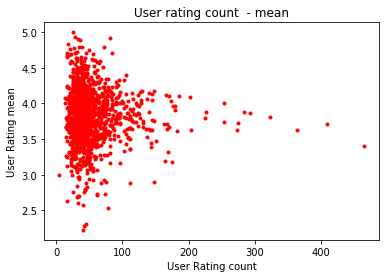

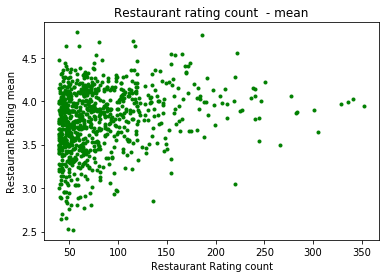

In [11]:
plt.xlabel('User Rating count')
plt.ylabel('User Rating mean')
plt.title('User rating count  - mean')
plt.plot(user_ratings['stars']['count'], user_ratings['stars']['mean'], 'r.')
plt.show()

plt.xlabel('Restaurant Rating count')
plt.ylabel('Restaurant Rating mean')
plt.title('Restaurant rating count  - mean')
plt.plot(restaurant_ratings['stars']['count'], restaurant_ratings['stars']['mean'], 'g.')
plt.show()

In [12]:
def construct_matrix(data_frame, total_set, row_label, col_label):
    indexes = []
    matrix = []
    mask_matrix = []
    for index, grouped in data_frame.groupby(row_label):
        indexes.append(index)
        joined_ratings = pd.merge(restaurant_ratings,grouped, on=col_label, how='outer').fillna(0)
            
        matrix.append(joined_ratings['stars'].tolist())
        mask_matrix.append(joined_ratings['stars'].map(lambda x : 1 if x != 0 else 0))
    return indexes, matrix, mask_matrix
    
train_user_index, train_user_ratings, train_user_ratings_mask = construct_matrix(train, user_ratings, 'user_id', 'business_id')
test_user_index, test_user_ratings, test_user_ratings_mask = construct_matrix(test, user_ratings, 'user_id', 'business_id')

/anaconda2/envs/yelplatest/lib/python2.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


                business_id stars          
                            count      mean
272  KalAJyO0Zpg3K1wVwYXBHA   122  3.877049


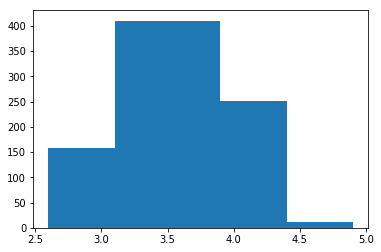

In [13]:
print restaurant_ratings.sample()
rest_avg_rating = vegas_df.groupby('business_id')['stars'].mean().reset_index(name='mean')
a = np.ones((num_user, 1))
f = np.array([rest_avg_rating['mean'].tolist()])
baseline_p = np.dot(a, f)

f_hist, bin_edges = np.histogram(f, bins=[3,3.5,4,4.5,5])
plt.bar(bin_edges[:-1], f_hist)
plt.show()

In [14]:
def get_RMS(input_matrix, baseline, mask, K):
    delta = input_matrix - baseline
    return LA.norm(np.multiply(mask, delta)) / math.sqrt(K)

print'train data RMS = {0}'.format(get_RMS(baseline_p, train_user_ratings, train_user_ratings_mask, num_train))

train data RMS = 0.966007972696


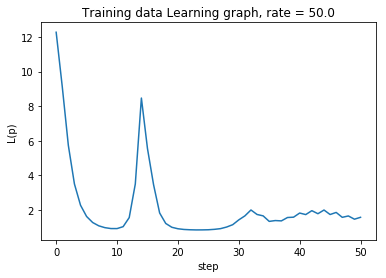

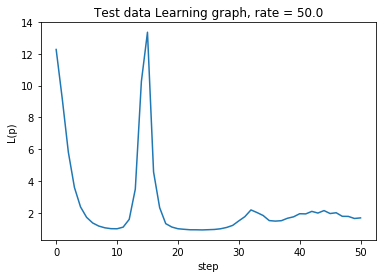

learning result, prediction = [[4.29256706 4.56998195 3.52115343 ... 4.44456615 3.22829808 3.86915537]
 [3.78936869 3.66115614 3.35103135 ... 3.84804955 3.44147127 3.57441608]
 [4.12806974 4.07010033 3.59741816 ... 4.2085286  3.6195254  3.85912489]
 ...
 [4.58848712 4.84775577 3.78813255 ... 4.74342281 3.50994738 4.15175173]
 [4.2385658  4.44144331 3.52306176 ... 4.37427592 3.30034086 3.85072421]
 [3.19958664 3.49008713 2.57014414 ... 3.3298249  2.27355191 2.84834616]]
test prediction RMS = 1.29945677503


In [15]:
def calculate(R, S, A, F):
    return np.multiply(R, S - np.dot(A, F))
    
def calculate_LP(K, R, S, A, F):
    norm = LA.norm(calculate(R, S, A, F))
    return norm * norm / K

def learn_AF(K, R, S, learning_rate, step, K_test, R_test, S_test):
    seq_A = [np.random.rand(num_user,2)]
    seq_F = [np.random.rand(2, num_rest)]
    train_seq_LP = [calculate_LP(K, R, S, seq_A[-1], seq_F[-1])]
    test_seq_LP = [calculate_LP(K_test, R_test, S_test, seq_A[-1], seq_F[-1])]
    for i in range(step):
        prev_A = seq_A[-1]
        prev_F = seq_F[-1]
        F_T = np.transpose(prev_F)
        A_T = np.transpose(prev_A)
        temp = calculate(R, S, prev_A, prev_F) 
        seq_A.append(prev_A - (-2.0) * np.dot(temp, F_T) * learning_rate / K)
        seq_F.append(prev_F - (-2.0) * np.dot(A_T, temp) * learning_rate / K)
        train_seq_LP.append(calculate_LP(K, R, S, seq_A[-1], seq_F[-1]))
        test_seq_LP.append(calculate_LP(K_test, R_test, S_test, seq_A[-1], seq_F[-1]))
    plt.xlabel('step')
    plt.ylabel('L(p)')
    plt.title('Training data Learning graph, rate = ' + str(learning_rate))
    plt.plot(range(step + 1),train_seq_LP)
    plt.show()
    plt.xlabel('step')
    plt.ylabel('L(p)')
    plt.title('Test data Learning graph, rate = ' + str(learning_rate))
    plt.plot(range(step + 1),test_seq_LP)
    plt.show()
    return seq_A, seq_F, train_seq_LP, test_seq_LP

a_params_seq, f_params_seq, train_lp_seq, test_lp_seq = learn_AF(train.shape[0], train_user_ratings_mask, train_user_ratings, 50.0, 50, test.shape[0], test_user_ratings_mask, test_user_ratings)

prediction =  np.dot(a_params_seq[-1], f_params_seq[-1])
print "learning result, prediction = {}".format(prediction)
print "test prediction RMS = {}".format(get_RMS(prediction, test_user_ratings, test_user_ratings_mask, test.shape[0]))